# Transform HTSeq raw counts (abs vals) to TPMs.

Made by: Cynthia Soto <br>
Date: March 17th 2021 <br>
Last md: xxxx <br>

Converted absolute counts to TPMs count (to make the samples comparable)  <br>

**Assumptions:**<br>
1. Matrix expression
2. File with gene_lenghts (run first <Gene_length_extraction_from_GTF> file if you do not have the lenghts vector) 


In [149]:
# Libraries required
import os 
import pandas as pd
import numpy as np

from bioinfokit.analys import norm, get_data    ##https://github.com/reneshbedre/bioinfokit 
# load sugarcane RNA-seq expression dataset (Published in Bedre et al., 2019)
# Requires: scikit-learn, pandas, seaborn, matplotlib-venn, statsmodels, textwrap3, numpy, scipy, tabulate, matplotlib, adjustText

In [155]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data


### Transform counts to transcript per million "TPM"

Notes:
   1. TPM considers the gene length for normalization
   2. TPM is suitable for sequencing protocols where reads sequencing depends on gene length <br>
More details: https://www.reneshbedre.com/blog/expression_units.html

**load expression matrix**

In [172]:
df_expr=pd.read_csv("matrices_de_expresion/all_infected_Log2_17ceros_drop.csv", header=0, sep='\t')    ## ,nrows=100  usecols=[1,3] / Araport11_GFF3.gff
df_expr.head(5)

,Unnamed: 0,Genes,SRR10586397,SRR364399,SRR364401,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR6283146,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364400,SRR364391,SRR10586399,SRR364392,SRR364398,zero-counter
0,0,AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515,0
1,1,AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196,0
2,2,AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432,0
3,3,AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781,0
4,4,AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808,0


In [173]:
df_expr.drop(['zero-counter', 'Unnamed: 0'], axis='columns', inplace=True)
df_expr.head(5)

,Genes,SRR10586397,SRR364399,SRR364401,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR6283146,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364400,SRR364391,SRR10586399,SRR364392,SRR364398
0,AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515
1,AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196
2,AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432
3,AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781
4,AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808


**load gene lenght's file**

In [176]:
df_gl=pd.read_csv("../meta-data/Araport11_GFF3_genes_lenghts.csv",  usecols = ['Genes','gen_len'], header=0, sep='\t')    
df_gl.head(5)

,Genes,gen_len
0,AT1G01010,1871
1,AT1G01020,1752
2,AT1G01030,1077
3,AT1G01040,7561
4,AT1G01050,1289


**merge the gene length column to the expr matrix df**

In [177]:
## compare number of gene labels
print(len(df_expr), len(df_gl))

24240 27655


With **merge** we can join data from 2 df<br>
The **how** argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. 
Only the keys appearing in left and right are present (the intersection), since **how='inner'** by default.<br>
https://pandas.pydata.org/docs/user_guide/merging.html

In [178]:
result = pd.merge(df_expr, df_gl, on=["Genes", "Genes"])

In [179]:
len(result)

24240

In [198]:
result.head(10)
result[['Genes','SRR10586397','SRR364399','SRR364401','gen_len']].head(10)

,Genes,SRR10586397,SRR364399,SRR364401,gen_len
0,AT1G01010,8.577429,6.930737,7.098032,1871
1,AT1G01020,7.228819,6.727920,7.000000,1752
2,AT1G01030,5.727920,3.584963,3.807355,1077
3,AT1G01040,10.167418,9.262095,9.339850,7561
4,AT1G01050,9.967226,7.954196,8.154818,1289
5,AT1G01060,6.686501,9.016808,9.038919,3070
6,AT1G01070,7.055282,6.523562,6.285402,1980
7,AT1G01080,9.523562,7.011227,7.266787,1287
8,AT1G01090,11.240791,9.197217,9.074141,1462
9,AT1G01100,10.497852,9.243174,9.710806,671


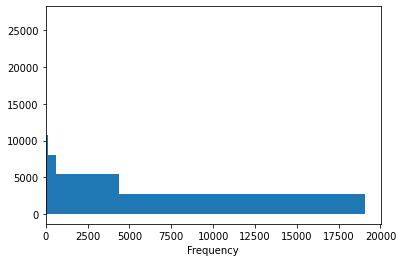

In [185]:
result['gen_len'].plot.hist(orientation="horizontal");   #, cumulative=True

In [187]:
# make gene column as index column
df = result.set_index('Genes')
df.head(5)

,SRR10586397,SRR364399,SRR364401,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR6283146,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364400,SRR364391,SRR10586399,SRR364392,SRR364398,gen_len
Genes,,,,,,,,,,,,,,,,,,
AT1G01010,8.577429,6.930737,7.098032,3.000000,5.614710,6.539159,7.044394,5.781360,6.044394,6.988685,6.965784,6.977280,7.033423,7.209453,8.607330,7.149747,6.942515,1871
AT1G01020,7.228819,6.727920,7.000000,5.129283,5.357552,7.149747,7.400879,5.285402,6.918863,7.375039,7.467606,7.330917,6.954196,7.531381,7.139551,7.643856,6.954196,1752
AT1G01030,5.727920,3.584963,3.807355,4.459432,5.087463,2.807355,4.523562,5.392317,4.321928,4.392317,3.169925,3.169925,3.000000,3.459432,5.906891,3.000000,3.459432,1077
AT1G01040,10.167418,9.262095,9.339850,6.228819,5.857981,10.047124,10.251482,6.741467,9.812177,10.382624,9.743151,9.842350,9.262095,10.055282,10.200899,10.080818,9.303781,7561
AT1G01050,9.967226,7.954196,8.154818,4.700440,4.247928,10.284246,9.768184,5.672425,9.481799,10.651949,8.689998,8.774787,8.294621,8.738092,9.744834,8.864186,8.016808,1289


In [188]:
# now, normalize raw counts using TPM method
# gene length must be in bp
nm = norm()
nm.tpm(df=df, gl='gen_len')
# get TPM normalized dataframe
tpm_df = nm.tpm_norm
tpm_df.head(2)
# output

,SRR10586397,SRR364399,SRR364401,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR6283146,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364400,SRR364391,SRR10586399,SRR364392,SRR364398
Genes,,,,,,,,,,,,,,,,,
AT1G01010,38.437383,37.687331,38.447245,25.711701,47.145559,34.536033,37.478190,43.280369,34.237410,35.535320,36.867856,36.821019,38.076828,37.794804,38.794203,37.770124,37.844481
AT1G01020,34.594233,39.069376,40.491605,46.946790,48.041831,40.325609,42.049223,42.255057,41.852612,40.046892,42.208403,41.314989,40.205054,42.164222,34.364417,43.123095,40.482972


In [189]:
tpm_df.sum(axis = 0, skipna = True) 

SRR10586397    1000000.0
SRR364399      1000000.0
SRR364401      1000000.0
SRR6283148     1000000.0
SRR6283147     1000000.0
SRR3383696     1000000.0
SRR3383780     1000000.0
SRR6283146     1000000.0
SRR3383779     1000000.0
SRR3383697     1000000.0
SRR364390      1000000.0
SRR364389      1000000.0
SRR364400      1000000.0
SRR364391      1000000.0
SRR10586399    1000000.0
SRR364392      1000000.0
SRR364398      1000000.0
dtype: float64